In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

In [114]:
print("GPUs:", tf.config.list_physical_devices('GPU'))

GPUs: []


In [115]:
train_df = pd.read_csv('train_data.csv').dropna(subset=['text', 'sentiment'])
# train_df = train_df.sample(frac=0.5, random_state=42).reset_index(drop=True)
test_df = pd.read_csv('test_data.csv').dropna(subset=['text', 'sentiment'])
# test_df = test_df.sample(frac=0.5, random_state=42).reset_index(drop=True)

In [116]:
print(len(train_df), len(test_df))

1273807 318482


In [117]:
test_df.head()

,text,sentiment
0,yes black red fav colors really wanted colors ...,0
1,qu buy open house weekend ampm best value one ...,1
2,fran greet air thats okay hahahaha thanks,1
3,omg thats awesome goood luck u meet caaute cal...,1
4,hahahhaha good point,1


In [118]:
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 32

In [119]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

In [120]:
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [121]:
print(len(X_train), len(X_val))

1019045 254762


In [122]:
list(tokenizer.index_word.items())[:20]

[(1, '<OOV>'),
 (2, 'im'),
 (3, 'good'),
 (4, 'day'),
 (5, 'get'),
 (6, 'like'),
 (7, 'go'),
 (8, 'dont'),
 (9, 'today'),
 (10, 'going'),
 (11, 'love'),
 (12, 'work'),
 (13, 'cant'),
 (14, 'got'),
 (15, 'time'),
 (16, 'back'),
 (17, 'lol'),
 (18, 'u'),
 (19, 'one'),
 (20, 'know')]

In [123]:
word_index = tokenizer.word_index
print(f'{len(word_index)} unikatowych słów.')

358064 unikatowych słów.


In [124]:
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)),
    GRU(16),
    Dense(1, activation='sigmoid')
])


C:\Users\cynar\Desktop\projects\sieci\venv\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,417 (1.23 MB)

 Trainable params: 322,417 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [126]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_val, y_val)
)

Epoch 1/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 180s 44ms/step - accuracy: 0.7565 - loss: 0.4958 - val_accuracy: 0.7872 - val_loss: 0.4508
Epoch 2/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 177s 45ms/step - accuracy: 0.7940 - loss: 0.4378 - val_accuracy: 0.7911 - val_loss: 0.4440
Epoch 3/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 179s 45ms/step - accuracy: 0.8013 - loss: 0.4251 - val_accuracy: 0.7922 - val_loss: 0.4419
Epoch 4/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 190s 48ms/step - accuracy: 0.8078 - loss: 0.4146 - val_accuracy: 0.7934 - val_loss: 0.4414
Epoch 5/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 143s 36ms/step - accuracy: 0.8121 - loss: 0.4054 - val_accuracy: 0.7925 - val_loss: 0.4429
Epoch 6/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 127s 32ms/step - accuracy: 0.8173 - loss: 0.3969 - val_accuracy: 0.7922 - val_loss: 0.4449
Epoch 7/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 169s 42ms/step - accuracy: 0.8220 - loss: 0.3886 - val_accuracy: 0.7914 - val_loss: 0.4490
Epoch 8/10
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 179s 45ms/step - accuracy: 

In [127]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nDokładność na danych testowych: {test_acc:.4f}')

9953/9953 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.7874 - loss: 0.4688

Dokładność na danych testowych: 0.7878


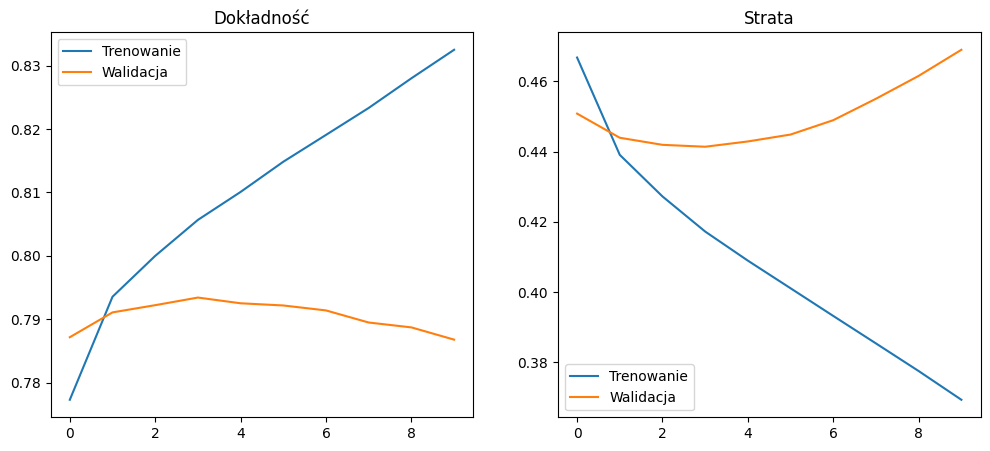

In [128]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trenowanie')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.title('Strata')
plt.legend()

plt.show()

9953/9953 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step


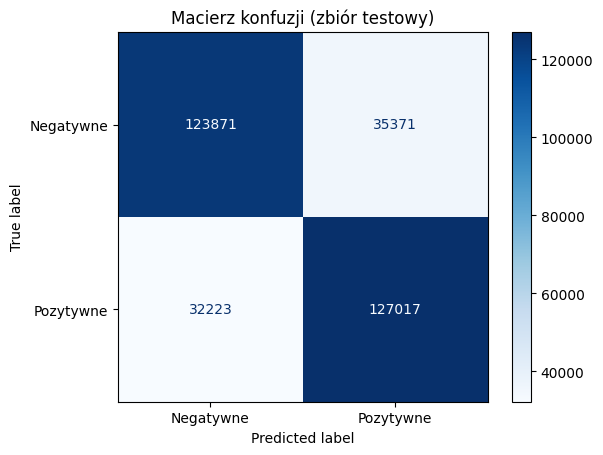

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatywne", "Pozytywne"])
disp.plot(cmap='Blues')
plt.title('Macierz konfuzji (zbiór testowy)')
plt.show()
